# MATH 210 Intro to  Mathematical Computing


Start of linear algebra applications

In [44]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

## scipy.linalg

We represent matrices as NumPy arrays.

In [2]:
M = np.array([[1,2],[3,4]])

In [3]:
print(M)

[[1 2]
 [3 4]]


Matrix multiplication is given by the `@` symbol.

In [14]:
M * M

array([[ 1,  4],
       [ 9, 16]])

In [15]:
M @ M

array([[ 7, 10],
       [15, 22]])

Unfortunately, there is no matrix power operation symbol like `^` in MATLAB.

Instead, there is a function we can use:

In [17]:
np.linalg.matrix_power(M,2)

array([[ 7, 10],
       [15, 22]])

The reason for this is that matrix multiplication is computationally expensive for big matrices so it is better to use an optimized function. 

There are several fuctions for doing familiar linear algebra operations.

In [18]:
N = np.array([[3,2,1],[-1,1,0],[4,-2,1]])

In [19]:
N

array([[ 3,  2,  1],
       [-1,  1,  0],
       [ 4, -2,  1]])

In [20]:
N@N

array([[11,  6,  4],
       [-4, -1, -1],
       [18,  4,  5]])

Computing the inverse:

In [21]:
la.inv(N)

array([[ 0.33333333, -1.33333333, -0.33333333],
       [ 0.33333333, -0.33333333, -0.33333333],
       [-0.66666667,  4.66666667,  1.66666667]])

Computing the determinant:

In [28]:
la.det(N)

3.0

Computing the transpose (note the np prefix):

In [27]:
N.T

array([[ 3, -1,  4],
       [ 2,  1, -2],
       [ 1,  0,  1]])

In [26]:
np.transpose(N)

array([[ 3, -1,  4],
       [ 2,  1, -2],
       [ 1,  0,  1]])

Solving a system of equations $Ax = b$:

In [31]:
A = np.array([[0,1],[1,2]])
b = np.array([[2],[1]])
print(A)
print(b)

[[0 1]
 [1 2]]
[[2]
 [1]]


In [32]:
x = la.solve(A,b)

In [33]:
print(x)

[[-3.]
 [ 2.]]


Let's verify this is the solution:


In [34]:
A@x

array([[2.],
       [1.]])

We could also use the inverse to solve this:

In [35]:
x = la.inv(A)@b

In [36]:
print(x)

[[-3.]
 [ 2.]]


This is usually a bad idea because `la.solve` is much more optimized to solve the system very quickly.

In [47]:
N = 100
A = np.random.rand(N,N)
b = np.random.rand(N,1)

In [48]:
%%timeit
x = la.solve(A,b)

3.79 s ± 963 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [50]:
%%timeit
x = la.inv(A)@b

7.25 s ± 1.72 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Example

Let's verify the Cayley-Hamilton Theorem for some specific matrices.

For a 2 by 2 matrix, we can show
$$
p(\lambda ) = \lambda ^2 - \text{tr}(A)\lambda + \text{det}(A)
$$

In [52]:
A = np.array([[4,1],[-2,3]])
print(A)

[[ 4  1]
 [-2  3]]


In [53]:
np.trace(A)

7

In [54]:
la.det(A)

14.0

In [56]:
A@A - 7*A + 14*np.eye(2)

array([[0., 0.],
       [0., 0.]])

In [57]:
A = np.random.rand(2,2)
result = A@A - np.trace(A)*A + la.det(A)*I

NameError: name 'I' is not defined

# Another Day Another Dollar

In [22]:
def scale_row(A,i,k):
    M = A.shape[0]
    E = np.eye(M)
    E[i,i] = k
    return E@A

In [4]:
A = np.array([[1,2,3],[4,5,6]])
print(A)

[[1 2 3]
 [4 5 6]]


In [5]:
scale(A,1,3)

array([[ 1.,  2.,  3.],
       [12., 15., 18.]])

In [16]:
def add_rows(A,k,i,j):
    M = A.shape[0]
    E = np.eye(M)
    E[j,i] = k
    return E@A

In [17]:
add_rows(A,3,0,1)

array([[ 1.,  2.,  3.],
       [ 7., 11., 15.]])

In [15]:
def switch_rows(A,i,j):
    M = A.shape[0]
    E = np.eye(M)
    E[i,i] = 0
    E[j,j] = 0
    E[i,j] = 1
    E[j,i] = 1
    return E@A

In [18]:
switch_rows(A,0,1)

array([[4., 5., 6.],
       [1., 2., 3.]])

Let's use Gaussian elimination with these functions to solve
$$
x_0+2x_1=3
$$
$$
4x_0+5x_1=6
$$

In [19]:
A1 = add_rows(A,-4,0,1)
print(A1)

[[ 1.  2.  3.]
 [ 0. -3. -6.]]


In [27]:
A2 = scale_row(A1,1,-1/3)
print(A2)

[[1. 2. 3.]
 [0. 1. 2.]]


In [28]:
A3 = add_rows(A2,-2,1,0)
print(A3)

[[ 1.  0. -1.]
 [ 0.  1.  2.]]


In [29]:
np.array([[1,2],[4,5]]) @ np.array([[-1],[2]])

array([[3],
       [6]])

# Interpolation

Let's find the unique polynomial of degree 2 which passes through the points $(0,2),(1,-1),(2,0)$.

Let $p(x) = a_0 + a_1x+a_2x^2$. We need to solve for $a_0,a_1,a_2$ such that
$$
a_0 = 2
$$
$$
a_0+a_1+a_2 = -1
$$
$$
a_0 + 2a_1+4a_2 = 0
$$

In [31]:
A = np.array([[1,0,0,2],[1,1,1,-1],[1,2,4,0]])
print(A)

[[ 1  0  0  2]
 [ 1  1  1 -1]
 [ 1  2  4  0]]


In [32]:
A1 = add_rows(A,-1,0,1)
print(A1)

[[ 1.  0.  0.  2.]
 [ 0.  1.  1. -3.]
 [ 1.  2.  4.  0.]]


In [34]:
A2 = add_rows(A1,-1,0,2)
print(A2)

[[ 1.  0.  0.  2.]
 [ 0.  1.  1. -3.]
 [ 0.  2.  4. -2.]]


In [35]:
A3 = add_rows(A2,-2,1,2)
print(A3)

[[ 1.  0.  0.  2.]
 [ 0.  1.  1. -3.]
 [ 0.  0.  2.  4.]]


In [38]:
A4 = scale_row(A3,2,1/2)
print(A4)

[[ 1.  0.  0.  2.]
 [ 0.  1.  1. -3.]
 [ 0.  0.  1.  2.]]


In [41]:
A5 = add_rows(A4,-1,2,1)
print(A5)

[[ 1.  0.  0.  2.]
 [ 0.  1.  0. -5.]
 [ 0.  0.  1.  2.]]


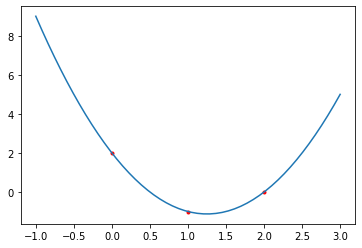

In [6]:
x = np.array([0,1,2])
y = np.array([2,-1,0])
xs = np.linspace(-1,3,50)
ys = 2-5*xs + 2*xs**2
plt.plot(x,y,'r.')
plt.plot(xs,ys)

# More interpolation

[[  1   0   0   0   0]
 [  1   1   1   1   1]
 [  1   2   4   8  16]
 [  1   3   9  27  81]
 [  1   4  16  64 256]]


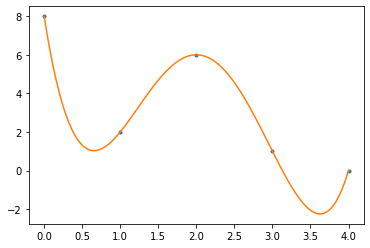

In [34]:
N = 5
x = np.arange(0,N)
y = np.random.randint(0,10,N)
X = np.vander(x,increasing=True)
print(X)
a = la.solve(X,y)
xs = np.linspace(0,N-1,100)
ys = sum([a[k]*xs**k for k in range(0,N)])
plt.plot(x,y,'.')
plt.plot(xs,ys)

Simple interpolation doesn't work well in practice due to the fact that small changes in the points create large changes in the coefficients. Also, it is over-fitting. We should use linear regression on large data. 

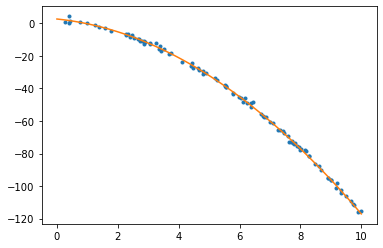

In [47]:
N = 100
x = np.random.rand(N)*10
y = 3 - 2*x - x**2 + np.random.randn(N)
X = np.column_stack((np.ones(N),x,x**2))
a = la.solve(X.T@X,X.T@y)
xs = np.linspace(0,10,100)
ys = sum([a[k]*xs**k for k in range(0,len(a))])
plt.plot(x,y,'.')
plt.plot(xs,ys)

# Yet another day yet another dollar

In [2]:
A = np.array([[0.9,0.2],[0.1,0.8]])

In [3]:
evals , evecs = la.eig(A)

In [4]:
evals = np.real(evals)

In [5]:
print(evals)

[1.  0.7]


In [6]:
print(evecs)

[[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]


In [7]:
P = evecs

In [8]:
Dinf = np.array([[1,0],[0,0]])

In [9]:
P@Dinf@la.inv(P)

array([[0.66666667, 0.66666667],
       [0.33333333, 0.33333333]])

In [56]:
import networkx as nx

A simple undirected graph

/opt/conda/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


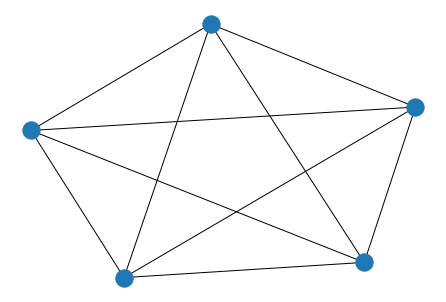

In [57]:
G = nx.complete_graph(5)
nx.draw(G)


# More applications to Graph Theory

The number of paths of length $k$ in a simple undirected graph $G$ from vertex $i$ to $j$ is the $i,j$ entry of $A^k$ where $A$ is the adjacency matrix.

/opt/conda/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


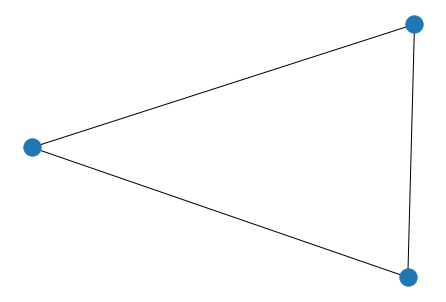

In [12]:
G1 = nx.complete_graph(3)
nx.draw(G1)

In [13]:
G1 = nx.complete_graph(3)
A1 = nx.adjacency_matrix(G1).todense()
A1

matrix([[0, 1, 1],
        [1, 0, 1],
        [1, 1, 0]], dtype=int64)

In [16]:
A1@A1@A1

matrix([[2, 3, 3],
        [3, 2, 3],
        [3, 3, 2]], dtype=int64)

We see that this works as intended.

/opt/conda/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


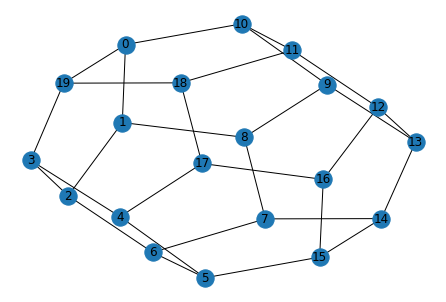

In [62]:
G2 = nx.dodecahedral_graph()
nx.draw(G2,with_labels=True)

What is the length of the shortest path from vertex $0$ and $15$?

In [63]:
A2 = nx.adjacency_matrix(G2).todense()
A2[0,15]

0

In [64]:
Ak = A2
for k in range(2,6):
    Ak = Ak @ A2
    if Ak[0,15] > 0:
        break
print(k)

5


What is the length of the longest shortest path?

In [65]:
x = []
An = A2
Ak = A2
for n in range (0,20):
    Ak = A2
    times = 1
    for k in range(0,20):
        Ak = Ak * A2
        times = times + 1
        if Ak[n,k] > 0:
            x.append(times)
            break

max(x)
    

5

The function in class is easier, tho:

In [60]:
G2 = nx.ladder_graph(10)

In [61]:
A2 = nx.adjacency_matrix(G3).todense()
Ak = A3
for k in range(2,20):
    Ak = Ak @ A3
    if np.count_nonzero(Ak) == A3.size:
        break
print(k)

19


In [69]:
A4 = nx.petersen_graph(10)
nx.draw(A4)

TypeError: 'int' object is not callable

In [4]:
la.inv([[1,17],[17,73.5]])@[[10.3],[46.4]]

array([[0.14733179],
       [0.59721578]])

In [7]:
la.solve(np.vander([-2,-1,1,3],increasing=True), [[3],[-6],[0],[-2]])

array([[-5.],
       [ 4.],
       [ 2.],
       [-1.]])

In [25]:
X = np.column_stack([np.ones(4),[3.5,4.0,4.5,5.0]])
y = np.hstack([1.0,2.2,2.8,4.3])
la.solve(X.T@X,X.T@y)

array([-6.35,  2.1 ])

In [26]:
X.T@y

array([10.3, 46.4])

In [27]:
X.T@X

array([[ 4. , 17. ],
       [17. , 73.5]])

In [18]:
A = np.array([[1,2],[3,4]])
vals = np.real(la.eig(A)[0])

In [7]:
import numpy as np
import scipy.linalg as la

In [19]:
vals

array([-0.37228132,  5.37228132])

In [43]:
X = np.array([[1,1970],[1,1990],[1,2011]])
y = np.array([21.3,27.5,33.5])
a = la.solve(X.T @ X , X.T @ y)
print(2030*a[1] + a[0])

39.232672482162684


In [42]:
X = np.vander([-1,0,1],increasing=True)
y = np.array([2,2,3])
la.solve(X,y)

array([2. , 0.5, 0.5])

array([2, 2, 3])

In [47]:
E = np.eye(3)
E[1,0] = 2
E

array([[1., 0., 0.],
       [2., 1., 0.],
       [0., 0., 1.]])

In [49]:
E.shape

(3, 3)

In [50]:
def is_symmetric(A):
    if not A.shape[0] == A.shape[1]:
        return False
    else:
        for i in range(0,A.shape[0]):
            for j in range(0,A.shape[1]):
                if A[i,j] != A[j,i]:
                    return False
    return True
                

In [55]:
is_symmetric(np.array([[1,2],[2,1]]))

True

In [58]:
for i in range(0,4):
    print(i)

0
1
2
3


In [59]:
A.shape

(2, 2)

In [65]:
np.zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [66]:
def almost_complete(n):
    E = np.eye(n)
    for i in range(0,n):
        for j in range(0,n):
            if abs(i-j) <= 1:
                E[i,j] = 0
            else:
                E[i,j] = 1
    return E

In [71]:
almost_complete(8)

array([[0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1.],
       [1., 0., 0., 0., 1., 1., 1., 1.],
       [1., 1., 0., 0., 0., 1., 1., 1.],
       [1., 1., 1., 0., 0., 0., 1., 1.],
       [1., 1., 1., 1., 0., 0., 0., 1.],
       [1., 1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 0., 0.]])

In [72]:
np.column_stack(([2,3,4],[2,4,5]))

array([[2, 2],
       [3, 4],
       [4, 5]])

In [80]:
def fun(a , b ):
    m = len(a ) - 1
    n = len(b ) - 1
    mn = m + n
    ab = [0 for _ in range(0 , mn + 1)]
    for i in range(0 , m + 1):
        for j in range(0 , n + 1):
            ab[ i + j ] = ab[ i + j ] + a[ i ]*b[ j ]
            print(ab)
    return ab
   

y = fun([3 ,1 , -1] ,[1 ,2])
print( y )

[3, 0, 0, 0]
[3, 6, 0, 0]
[3, 7, 0, 0]
[3, 7, 2, 0]
[3, 7, 1, 0]
[3, 7, 1, -2]
[3, 7, 1, -2]


In [81]:
round?

In [82]:
np.linspace(0,1,5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [83]:
def fun(x , y ):
    D = ( y [1:] - y [: -1])/( x [1:] - x [: -1])
    return np.max( D)
x = np.linspace(0 ,1 ,5)
y = x **3 + x + 1
result=fun(x , y )
print( result )

3.3125


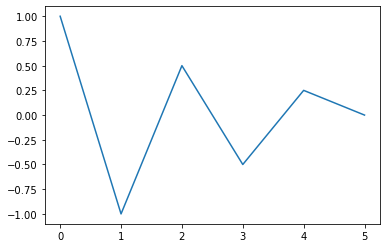

In [84]:
x = np.linspace(0,5,6)
y = [1,-1,0.5,-0.5,0.25,0]
plt.plot(x,y)
plt.show()

In [88]:
np.zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [94]:
def solve_A(N,b):
    A = np.zeros((N+1,N+1))
    for i in range(0,N+1):
        for j in range(0,N+1):
            A[i,j] = i**2 - j**2
    print(A)
    return la.solve(A - np.eye(N+1),b)
    

In [95]:
solve_A(3,[1,2,3,4])

[[ 0. -1. -4. -9.]
 [ 1.  0. -3. -8.]
 [ 4.  3.  0. -5.]
 [ 9.  8.  5.  0.]]


array([ 0.6751269 , -0.07106599, -0.30964467, -0.04060914])

In [96]:
def seq(x0,a,N):
    x = [x0]
    for n in range(1,N+1):
        xn = x[n-1]**2 + a
        x.append(xn)
    return x

In [115]:
12039**120398

8408516343192917771825682085697894037681711818830702526555321324151598649501976878617627966599930343011871401650018512806218090729246815387882102555235071913616485324494119699991791111361582133042392183922039792333862946609080923765035415552545528215017929096222731922406733289917333878546428358608811388721104869346365387679282213544244133909096636775737775757130402750606471959238444451079789171238211629696218230035715380610033369476124681211053821869469812525854908793267665183924781365810402088958287958369285602463810514383481139358404337224245017604463026025690525464988642447256788183474951620332062215236721033748228256688656833387045794017330420622262836700223131485125450690206034940945519765781885781797185397657397807629561542021811731461644670903947812999839827336800130792642977152166693184728359391679698854781336681114140703798399554580308957128437835091914943095855200376095763078967414919998476091456934867894474534132830905048901372899784526709248262642969566852367342744371605552